### Source

https://www.linkedin.com/pulse/approaching-almost-any-machine-learning-problem-abhishek-thakur

# Machine Learning Framework

In this notebook we summarize notes on Abhishek Thakur's article: Approaching (Almost) Any Machine Learning Problem. 
Published July 18, 2016. 


### Data

Before applying any machine learning, the data must be in tabular form. 
By tabular form we mean that we have labels for each row determining the outcome of that item. Kaggle provides tabular data on all competions. 

* In tabular data we denote data by X and labels by Y

Transforming the data into tabular format, and engineering features into the data is a process that usually takes 60-70% of the work involved in data science. 

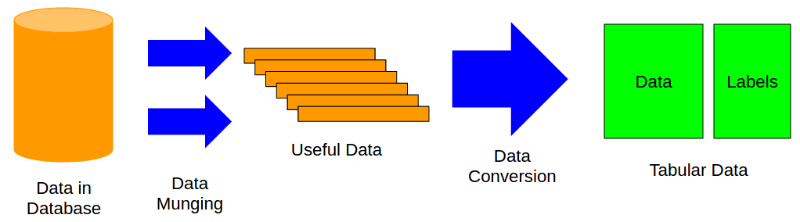

In [1]:
from IPython.display import Image
Image("../img/data_process.png")

### Types of Labels. 

The labels define the problem and can be of different types, such as:

* Single column, binary values (classification problem, one sample belongs to one class only and there are only two classes)
* Single column, real values (regression problem, prediction of only one value)
* Multiple column, binary values (classification problem, one sample belongs to one class, but there are more than two classes)
* Multiple column, real values (regression problem, prediction of multiple values)
* And multilabel (classification problem, one sample can belong to several classes)

### Evaluation Metrics

For any machine learnin problem, we must know how we are going to evaluate our results or what the objective is. 
E.g. 
For skewed binary classification we generally choose the area under the Receiver Operating Characteristic Curve (ROC AUC or AUC). 
In case of Multi-label or multi-class classification we generally choose categorical cross-entropy or multiclass log loss. 
For regression problems mean-squared error. 


#### ROC 
A ROC is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied. 
The curve is generated by plotting the false positive rate and the false negative rate at various threshold settings. 

True positives are known as sensitivity or recall. 
False positives are known as fall-out and is calculated as (1-specificity) 

The ROC is the sensitivity as a function of fall-out. 

If the probability distribution of both detection and false alarm are known, the ROC curve can be generated by plotting the cummulative distribution function. 

Analysis of the ROC provides tools to select possible optimal models and to discard suboptimal ones independently (and prior to specifying) the cost context or the class distribution. It is related in a direct and natural way to cost/benefit analysis of diagnostic decision making. 

#### AUC


#### Mean Square Error


### The Libraries

    * pandas : to see and do operations on the data
    * scikit-learn : for machine learning models, in general
    * xcboost : gradient boosting library 
        - https://github.com/dmlc/xgboost
    * keras : for neural networks
        - http://keras.io/)
        - neural network. works on Teano and Tensor Flow. 
        
    * matplotlib : for plotting the data. 
    * tqdm: to monitor progress. 
        - https://pypi.python.org/pypi/tqdm
        - it adds progress bars to for loops <3
        from tqdm import tqdm
        
        for i in tqdm(range(10000)):
            sleep(0.1)
            
            
    

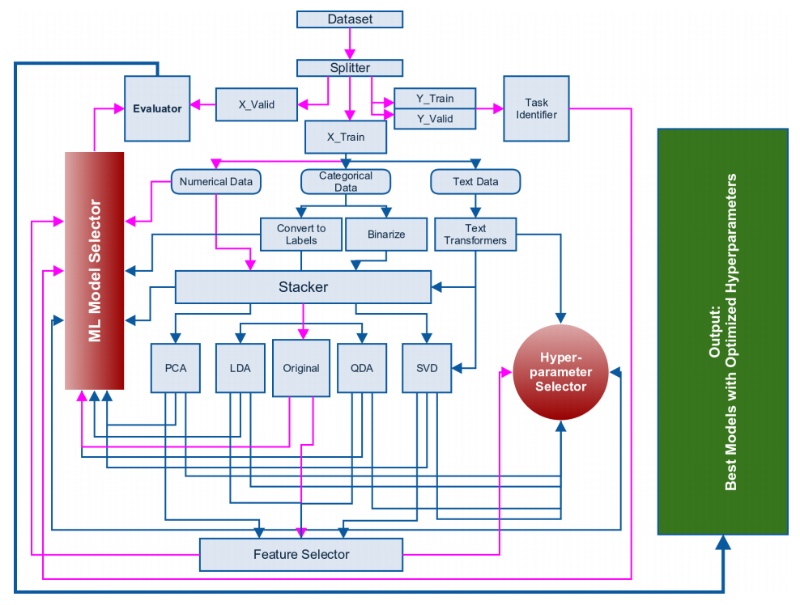

In [4]:
Image("../img/data_framework.png")

### Framework
 
In the framework shown above, the pink lines represent the most common paths. It is used for building ml models after data is coverted to tabular format. 

The first thing to do is to identify the problem, by looking at the labels, into a: 
 
    - Binary classification
    - Multi-class classification
    - Regression problem
    
After we identify the problem, we split the data into 2 different parts. 
A training set and a validation set. 

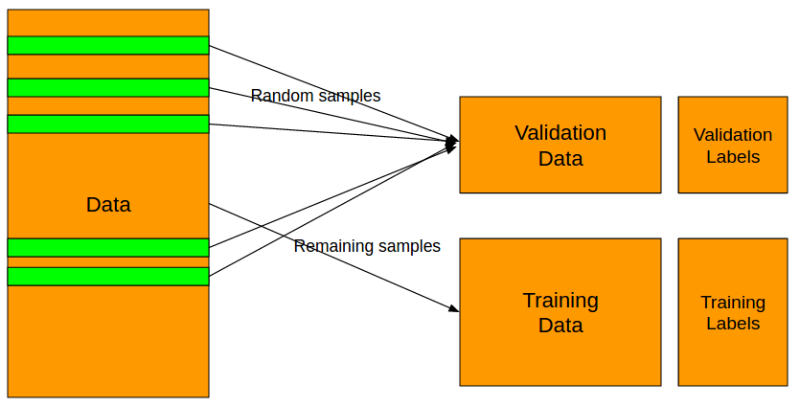

In [5]:
Image("../img/training_and_validation_sets.png")

The split into Training and validation sets must be done according to labels. In classification problems we use stratified splitting. 

In [ ]:
from sklearn.cross_validation import StratifiedKFold
eval_size = 0.10
kf = StratifiedKFold(y, round(1./eval_size))
train_indices, valid_indices = next(iter(kf))
X_train, y_train = X[train_indices], y[train_indices]
X_valid, y_valid = X[valid_indices], y[valid_indices]

    > to use with pandas X.iloc & y.iloc are necessary. 


In the case of regression task, we use K-Fold. 

> Further Research: methods which tend to keep the distribution of labels for training and validation sets evenly distributed. 

In [ ]:
from sklearn.cross_validation import KFold
eval_size = 0.10 
# the validation set is 10% of the total data. But this size is optional. 
kf = KFold(len(y), round(1./eval_size))
train_indices, valid_indices = next(iter(kf))
X_train, y_train = X[train_indices], y[train_indices]
X_valid, y_valid = X[valid_indices], y[valid_indices]

After splitting is done, leave the validation data alone and don't touch it. Any training done on this data makes the model overfit. 

### Identify the variables. 

Three basic types: 
    * Numerical 
    * Categorical
    * Text

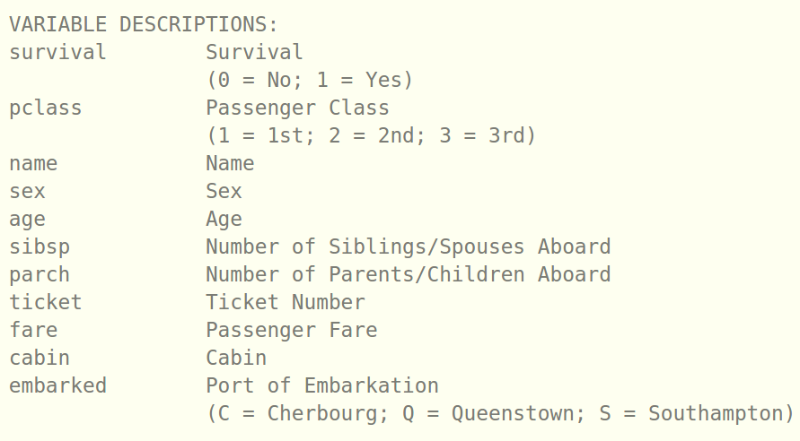

In [3]:
Image("../img/variables_example.png")

For example in the Titanic dataset. 
    
    Pclass, and sex are categorical values. 
    Age, fare, sibsp, parch are numerical. 
    Name is a text variable. 
    
Separate the numerical values first, these don't need any processing. We can apply normalization and ML models to these right away. 

There are 2 ways to handle categorical variables. 

    * Convert to labels:

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl_enc=LabelEncoder()
lbl_enc.fit(xtrain[categorical_features])
xtrain_cat = lbl_enc.transform(xtrain[categorical_features])

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
# take the categorical features. 
# Replace nans with 'NA'
# Transpose and output to dictionary. 
# keep only values, not indices. 

reshapedX= X_train[categorical_features].fillna('NA').T.to_dict().values()
# vectorize 
vectorizer = DictVectorizer(sparse = False )
x_vec = vectorizer.fit_transform(reshapedX)

# Use One Hot encoder to compress into binary data. 
ohe = OneHotEncoder()
ohe.fit(x_vec)
xtrain_cat = ohe.transform(x_vec)

    * Covert the labels to binary variables (one-hot Encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(xtrain[categorical_features])
xtrain_cat = ohe.transform(xtrain[categorical_features])

Always convert to numbers first with LabelEncoder before applying OneHotEncoder. 


For text variables, we can join them as follows:

In [ ]:
text_data = list(X_train.apply(lambda x: '%s %s' 
                               %(x['column1'], x['column2']), axis=1))


## We can then use CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
ctv = CountVectorizer()
text_data_train = ctv.fit_transform(text_data_train)
text_data_valid = ctv.fit_transform(text_data_valid)


## Or TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3, max_features=None, 
                     strip_accents='unicode', analyzer='word', 
                     token_pattern=r'\w{1,}', ngram_range=(1,2), 
                     use_idf=1, smooth_idf=1, sublinear_tf=1, 
                     stop_words='english')
## This settings work well almost all of the time. 

text_data_train = tfv.fit_transform(text_data_train)
text_data_valid = tfv.fit_transform(text_data_valid)

### if you apply these vectorizers only on the training set. 
### dump them into hard drive to apply them later to the validation set. 

import cPickle
cPickle.dump(vectorizer, open('vectorizer.pkl', 'wb'), -1)

## Feature Stacker

The feature stacker combines the features described above. 
For stacking we use numpy hstack or scipy sparse hstack 

depending on whether or not the data is sparse. 



In [ ]:
import numpy as np
from scipy import sparse

# in case of dense data

X = np.hstack((x1, x2, ...))

# in case data is sparse

X = sparse.hstack((x1, x2, ...))

We can also achieve by FeatureUnion module, in case there are other processing steps like PCA or feature selection. 

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

pca = PCA(n_components=10)
skb = SelectKBest(k=1)
combined_features = FeatureUnion([('pca', pca), ('skb', skb)])

### Start Applying Machine Learning Models. 
At this stage the only models we should use are ensemble tree based models. Such as: 
    
    * RandomForestClassifier
    * RandomForestRegressor
    * ExtraTreesClassifier
    * ExtraTreesRegressor
    * XGBClassifier
    * XGBRegressor
    
 We cannot apply linear models yet, since the features are not normalized. To use linear models one can use scikit-learn's: 
 
     * Normalizer
     * StandardScaler
     
     
These normalization works only on dense features, not on sparse. 
StandardScaler can work on sparse arrays with paramether with_mean=False


If the above steps give a "good" model, we can go for optimization of hyperparameters, and in case it doesn't we can use Decomposition methods and improve the model. 

    * Decomposition methods: 
        * PCA
        * LDA
        * Original
        * QDA
        * SVD
        
        
PCA is generally used for high dimensional data. 
    
    For imaes start with 10-15 components and increase these numbers as long as the quality of result improves substantially. For other type of data, we select 50-60 components initially. 
    We avoid PCA as long as we can deal with numerical data as is. 
    
    
    
    
 
 

In [ ]:
from sklearn.decomposition import PCA

pca= PCA(n_components=12)
pca.fit(xtrain)
xtrain = pca.transform(xtrain)

# For text data, after convertin to sparse matrix, 
# go for Singular Value Decomposition (SVD)

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=120)
svd.fit(train)
xtrain = svd.transform(xtrain)

After evaluating further performance, we move to scalin the datasets, so that we can use linear models too. 
### Feature Selection

Normalized or scaled features can then be sent to ML Models or feature selection modules. 

There are multiple ways for feature selection. 
One of the most common is greedy feature selection (forward or backward)
In greedy feature selection, we choose 1 feature, train a model and evaluate the performance on a fixed metric. We keep adding or removing features one-by-one and recording performance at every step. We select the features which give the best evaluation score. 
One implementation of greedy feature selection with AUC evaluation metric is found here: 
https://github.com/abhishekkrthakur/greedyFeatureSelection. 
It is not a perfect implementation and nees to be modified according to requirements. 


Other methods include selectin best features from a model. We can look at coeficients of a logit model or we can train a random forest to select best features and then use them later with other machine learning models. Such as RF and XGB, these are good for dense or sparse data. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit (X, y)
X_selected = clf.transform(X)
# remember to keep estimator number low to avoid overfitting. 

We can also select features with Gradient Boosting Machines. We use xgboost since they have a faster and more scalable implementation than sklearn. 

In [ ]:
import xgboost as xgb

params = {}
model = xgb.train(params, dtrain, n_boost_round=100)
sorted(model.get_fscore().items(), key=lambda t: -t[1])

# we can also use chi-2 based feature selection. 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

skb = SelectKBest(chi2, k=20)
skb.fit_transform(X, y)




## Model Selection & Hyperparamether optimization. 

The common algos in the process of selecting an ML model: 

   #### Classification:
   * Random Forest
   * GBM
   * Logistic Regression 
   * Naive Bayes 
   * Support Vector Machines
   * k-near neighbors
   
    #### Regression:
    
    * Random Forest
    * GBM
    * Linear Regression 
    * Ridge
    * Lasso 
    * SVR
    
Which paramethers to optimize? How do I choose starting paramethers close to the right ones? 
To answer this questions you need experience with different models and paramethers in a large number of data sets. 
    
    
These are a good starting point: 

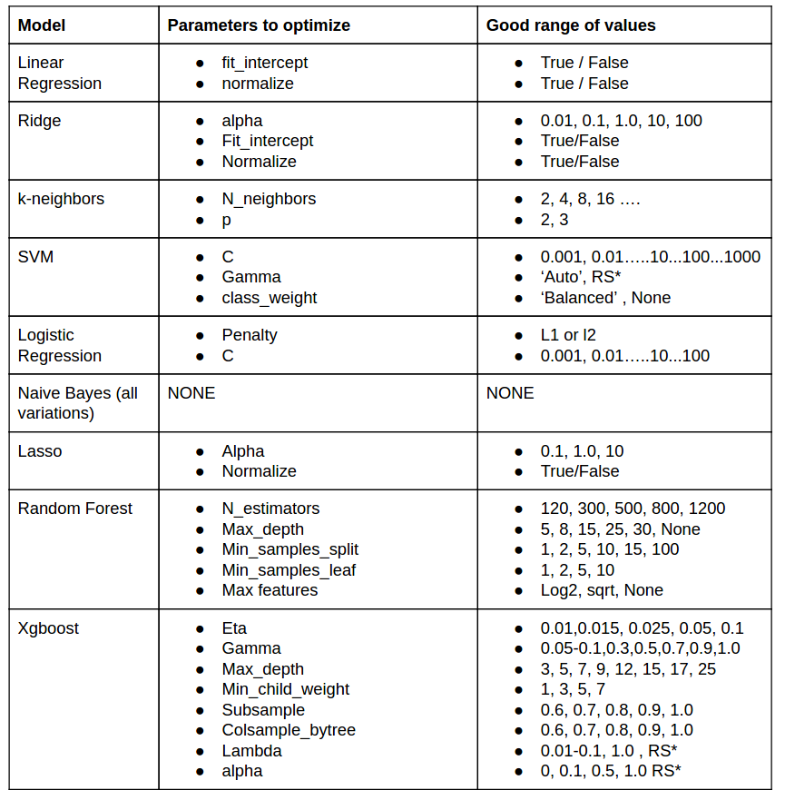

In [2]:
Image("../img/params.png")

RS* = use Random Search in these hyperparamethers

Remember to save the transformations, and apply them separately to the validation set. 